# importing required liaberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OrdinalEncoder,power_transform
from sklearn.metrics import r2_score

# Load dataset

In [2]:
dat = pd.read_excel('Flight_Train.xlsx')
dat.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_data = pd.read_excel('Flight_Test.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Checking Total number of rows and columns

In [104]:
dat.shape

(10683, 11)

In [105]:
test_data.shape

(2671, 10)

# Checking missing values

In [4]:
dat.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Checking data types

In [5]:
dat.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Filling missing value

In [6]:
dat['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [7]:
dat['Total_Stops'].mode()

0    1 stop
dtype: object

In [8]:
dat['Total_Stops'] = dat['Total_Stops'].fillna('1 stop')

In [9]:
dat['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# Dropping useless column

In [10]:
dat=dat.drop('Route',axis=1)

In [11]:
dat.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

# Creating additional column like Day,Month and Year

In [12]:
dat['Date_of_Journey']=pd.to_datetime(dat['Date_of_Journey'])

In [13]:
dat['Day'] = dat['Date_of_Journey'].dt.day

In [14]:
dat['Month'] = dat['Date_of_Journey'].dt.month

In [15]:
dat.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [16]:
# drop Date_of_Journey column
dat = dat.drop('Date_of_Journey',axis=1)

In [17]:
dat.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


# EDA

# Airline vs Price

<AxesSubplot:xlabel='Airline', ylabel='Price'>

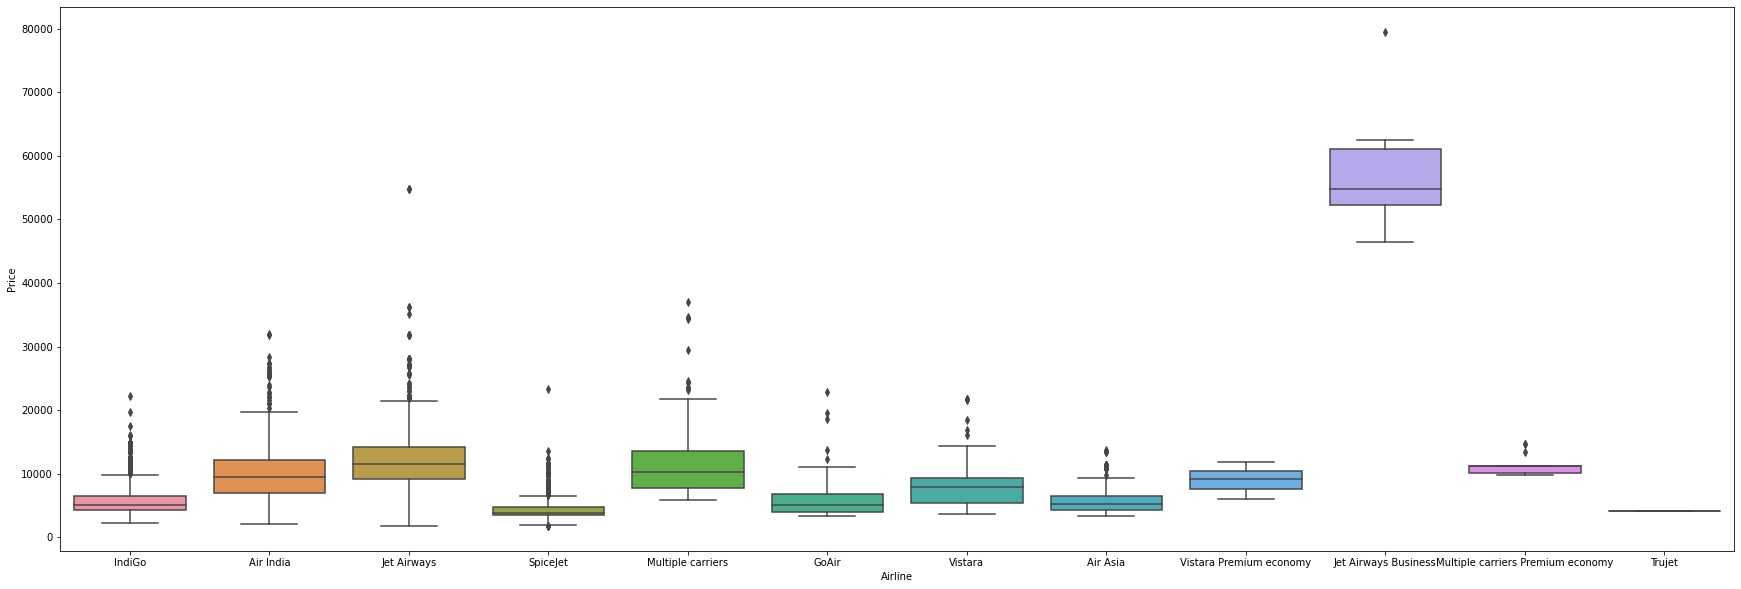

In [18]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Airline',y='Price',data=dat)

As per above observation flight fare is very high for Jet Airways Business.

# Source vs Price

<AxesSubplot:xlabel='Source', ylabel='Price'>

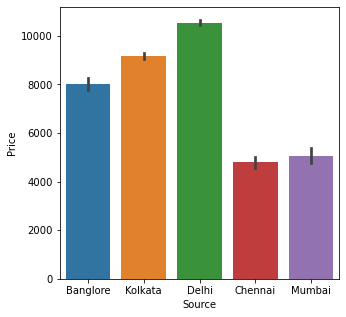

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='Source',y='Price',data=dat)

As per above observation fare price for Delhi is higher in comparison to other location.

# Destination vs Price

<AxesSubplot:xlabel='Destination', ylabel='Price'>

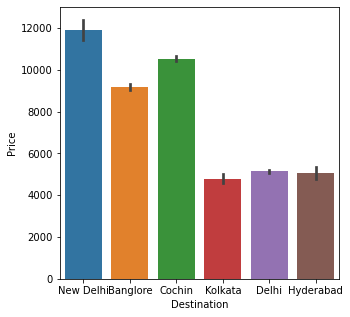

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x='Destination',y='Price',data=dat)

As per above observation, Destination price for New Delhi is higher in comparison to other cities.

# Total_Stops vs  Price

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

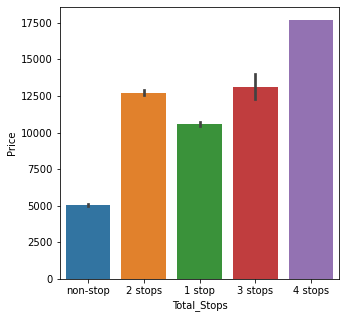

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(x='Total_Stops',y='Price',data=dat)

As per above observation, if stops are more then price will be higher.

# Additional_Info vs Price

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

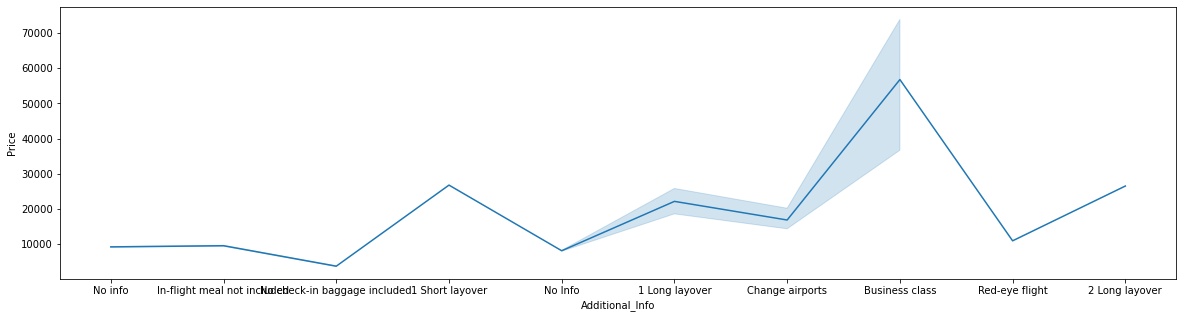

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Additional_Info',y='Price',data=dat)

As per above observation, Business class has higher price.

# Day vs Price

<AxesSubplot:xlabel='Day', ylabel='Price'>

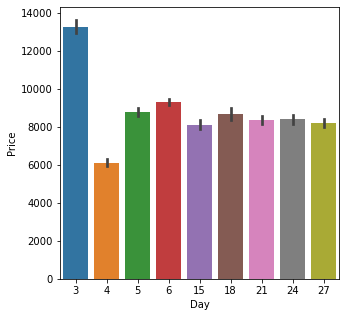

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x='Day',y='Price',data=dat)

As per above observation,price is very high on 3.

# Month vs Price

<AxesSubplot:xlabel='Month', ylabel='Price'>

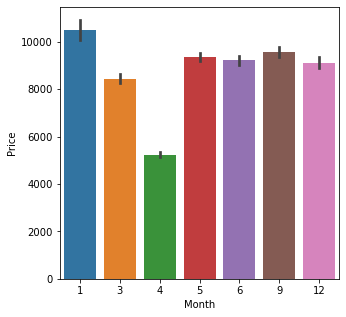

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x='Month',y='Price',data=dat)

As per above observation,during january price is very high.

In [25]:
dat.dtypes

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int64
Month               int64
dtype: object

# Segregating data into numerical and categorical data

In [26]:
dat_cat = dat.select_dtypes(include=['object'])

In [27]:
dat_cat.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info


# using get_dummies function to convert categorical data into numerical

In [28]:
dat_cat_dum = pd.get_dummies(dat_cat)

In [29]:
dat_cat_dum.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
dat_num = dat.select_dtypes(exclude=['object'])

In [31]:
dat_num.head()

,Price,Day,Month
0,3897,24,3
1,7662,5,1
2,13882,6,9
3,6218,5,12
4,13302,3,1


# Correlation

In [32]:
dat.corr()

,Price,Day,Month
Price,1.000000,-0.165412,0.010700
Day,-0.165412,1.000000,-0.264899
Month,0.010700,-0.264899,1.000000


<AxesSubplot:>

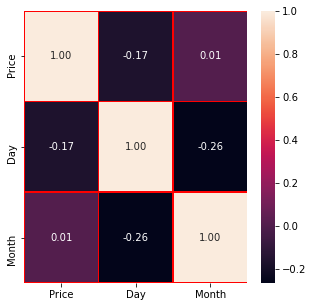

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(dat.corr(),annot=True,linecolor='r',linewidths=0.5,fmt='0.2f')

Findings from the above observation are mentioned below:
    
1) Day has 17% negetive correlation with Target column.

2) Month has 1% positive correlation with Target column.


# Checking Outlier on dat_num

<AxesSubplot:>

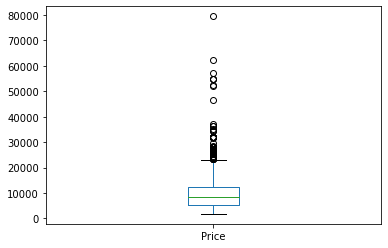

In [34]:
dat_num['Price'].plot.box()

As per above observation there is an outliers.

<AxesSubplot:>

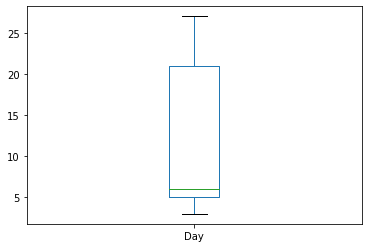

In [35]:
dat_num['Day'].plot.box()

As per above observation there is no outlier.

<AxesSubplot:>

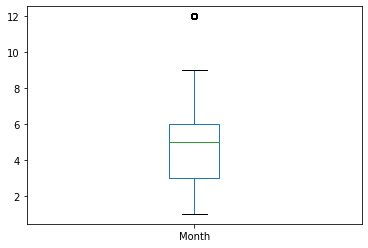

In [36]:
dat_num['Month'].plot.box()

As per above observation there is an outlier.

# Checking Skewness

In [37]:
dat.skew()

Price    1.812552
Day      0.367373
Month    0.629540
dtype: float64


Price ------->             1.812552 ==> Target column

Month ----->            0.629540 ====> skewed colummn

# Checking Normal Distribution

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Month', ylabel='Density'>

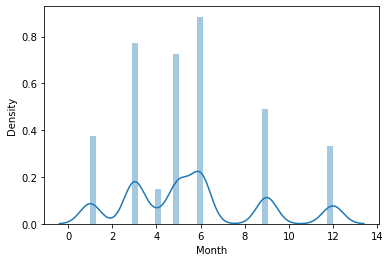

In [38]:
sns.distplot(dat_num['Month'])

As per above observation,Normal distribution shows that data is skewed.

# Removing Outlier

In [39]:
from scipy.stats import zscore

In [40]:
z = np.abs(zscore(dat_num))
z.shape

(10683, 3)

In [41]:
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   826,
         936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
        1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
        2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
        3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
        5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
        6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
        7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
        8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,  9019,
        9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160, 10182,
       10189, 10353, 10364, 10383, 10439, 10511], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 

In [45]:
dat_num_1 = dat_num[(z<3).all(axis=1)]
print(dat_num.shape)
print(dat_num_1.shape)

(10683, 3)
(10587, 3)


# Loss of percentage of data after removing outlier

In [46]:
loss = (10683-10578)/10683*100
print(loss)

0.9828699803426004


As per above observation, we are loosing 98% of our data hence we will not remove outlier from our dataset.

# Working on test data

In [47]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [48]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [49]:
# Checking Missing Values
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Changing data type from object to datetime

In [50]:
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])

In [51]:
test_data['Day']=test_data['Date_of_Journey'].dt.day

In [52]:
test_data['Month']=test_data['Date_of_Journey'].dt.month

In [53]:
# Dropping useless column
test_data = test_data.drop('Date_of_Journey',axis=1)

In [54]:
test_data = test_data.drop('Route',axis=1)

# Using encoding technique

In [56]:
oe = OrdinalEncoder()

In [57]:
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        test_data[i]=oe.fit_transform(test_data[i].values.reshape(-1,1))

In [58]:
test_data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month
0,4.0,2.0,1.0,138.0,150.0,10.0,0.0,5.0,6,6
1,3.0,3.0,0.0,31.0,353.0,248.0,0.0,5.0,5,12
2,4.0,2.0,1.0,156.0,566.0,148.0,0.0,3.0,21,5
3,6.0,2.0,1.0,48.0,633.0,36.0,0.0,5.0,21,5
4,0.0,0.0,2.0,198.0,135.0,216.0,4.0,5.0,24,6
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,170.0,617.0,150.0,0.0,5.0,6,6
2667,3.0,3.0,0.0,106.0,507.0,213.0,4.0,5.0,27,3
2668,4.0,2.0,1.0,183.0,151.0,278.0,0.0,5.0,3,6
2669,1.0,2.0,1.0,11.0,577.0,60.0,0.0,5.0,3,6


In [59]:
dat_num

,Price,Day,Month
0,3897,24,3
1,7662,5,1
2,13882,6,9
3,6218,5,12
4,13302,3,1
...,...,...,...
10678,4107,4,9
10679,4145,27,4
10680,7229,27,4
10681,12648,3,1


In [60]:
dat_num = dat_num.drop('Price',axis=1)

In [62]:
mm = MinMaxScaler()

In [63]:
dat_num_st=mm.fit_transform(dat_num)
dat_num_mm = pd.DataFrame(dat_num_st,index=dat_num.index,columns=dat_num.columns)
dat_num_mm.head()

,Day,Month
0,0.875000,0.181818
1,0.083333,0.000000
2,0.125000,0.727273
3,0.083333,1.000000
4,0.000000,0.000000


# merging two dataframe dat_cat_dum and dat_num_mm

In [64]:
final = pd.concat([dat_cat_dum,dat_num_mm],axis=1)
final.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Day,Month
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.875000,0.181818
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.083333,0.000000
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.125000,0.727273
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.083333,1.000000
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.000000,0.000000


# Dividing dataset into features and vector where x=features , y=vector

In [65]:
x = final
y = dat['Price']

# Splitting dataset into train and test 

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=77)

# Linear Regression

In [67]:
lr =LinearRegression()
lr.fit(x_train,y_train)
lr_pd = lr.predict(x_test)
r2_score(lr_pd,y_test)

-0.0005167608102767396

# Regularization

In [68]:
rd = Ridge()
rd.fit(x_train,y_train)
rd_pd = rd.predict(x_test)
r2_score(rd_pd,y_test)

0.7636056209305415

In [69]:
ls = Lasso()
ls.fit(x_train,y_train)
ls_pd = ls.predict(x_test)
r2_score(ls_pd,y_test)

C:\Users\jhamu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1660372050.7444992, tolerance: 18613996.28687195
  model = cd_fast.enet_coordinate_descent(


0.7279698525914933

In [70]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pd = dtr.predict(x_test)
r2_score(dtr_pd,y_test)

0.8954359964345188

In [71]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pd = rfr.predict(x_test)
r2_score(rfr_pd,y_test)

0.9233707191803335

In [72]:
# XGB RFRegressor

In [73]:
xgb =XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pd = xgb.predict(x_test)
r2_score(xgb_pd,y_test)

0.9002612713354397

# cross_validation

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
print(cross_val_score(lr,x,y,cv=5).mean())

-2.3069735470979752e+21


In [76]:
print(cross_val_score(rd,x,y,cv=5).mean())

0.793740807199507


In [77]:
print(cross_val_score(ls,x,y,cv=5).mean())

0.7774400722221053


In [78]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.8522750851846401


In [79]:
print(cross_val_score(rfr,x,y,cv=5).mean())

0.8927196884435767


In [80]:
print(cross_val_score(xgb,x,y,cv=5).mean())

0.8747577729147352


# Hyper parameter tuning

In [95]:
Parameters = {'max_iter':[500],
              'tol':[0.0001],
              'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],
              'random_state':[77],
              'alpha':[0.01,0.001,1,100]}

In [96]:
gsc = GridSearchCV(estimator=rd,param_grid=Parameters,cv=5)

In [97]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.001, 1, 100], 'max_iter': [500],
                         'random_state': [77],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.0001]})

# using best parameters to build model

In [98]:
gsc.best_params_

{'alpha': 1,
 'max_iter': 500,
 'random_state': 77,
 'solver': 'sparse_cg',
 'tol': 0.0001}

In [100]:
final_model = Ridge(alpha=1,max_iter=500,solver='sparse_cg',random_state= 77,tol=0.0001)
final_model.fit(x_train,y_train)
mod_pd = final_model.predict(x_test)
r2_score(mod_pd,y_test)

0.7635667969061222

# checking how my model is performing against Original dataset

In [101]:
a = np.array(y_test)
predicted = np.array(rd.predict(x_test))
df_com = pd.DataFrame({'Original':a,'predicted':predicted},index=range(len(a)))

In [102]:
df_com

,Original,predicted
0,7229,7756.718888
1,11200,12216.714564
2,12537,12095.340172
3,10529,9853.959310
4,10975,10767.263438
...,...,...
2132,2050,2945.374578
2133,13882,14540.703310
2134,3419,3220.890271
2135,8582,8983.119949


# Saving model

In [103]:
import joblib
joblib.dump(final_model,"Flight_fare_model")

['Flight_fare_model']